### Lab 5 Interestingness

In this lab, you will association rule mining. You will use basic Python libraries, the Apriori library (https://efficient-apriori.readthedocs.io/en/latest/) and the Networkx library (https://networkx.org). Please save the file in the folowwing format 'lab5_yourname.ipynb' and submit by the due date.

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
from PIL import Image

# Interestingness

### Interestingness through Market-Basket analysis

Market Basket Analysis is one of the key techniques used by large retailers to uncover associations between items. It works by looking for combinations of items that occur together frequently in transactions.

Association Rules are widely used to analyze retail basket or transaction data, and are intended to identify strong rules discovered in transaction data using measures of interestingness, based on the concept of strong rules.

### Apriori algorithm

The Apriori algorithm generates association rules for a given data set. An association rule implies that if an item A occurs, then item B also occurs with a certain probability. Let's look at an example.

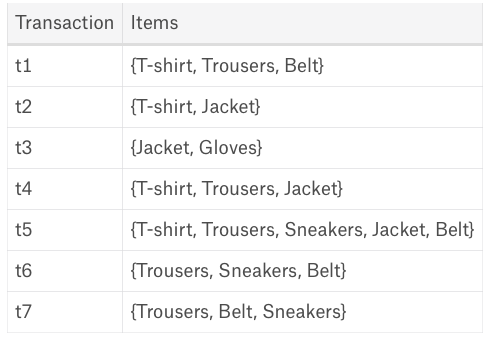

In [59]:
from IPython.display import Image
Image(filename='Images/market_basket.v1.png')

In the table above seven transactions from a clothing store are shown. Each transaction shows items bought in that transaction. We can represent our items as an item set as follows

$$ I = (i_1,i2,..., in) $$

                                        
In this case it will be:

                               
                                {T-shirt,Trousers,Belt,Jacket,Gloves,Sneakers}

A transaction is represented by the following expression:

$$  T = {t_1,i_2,..., t_k} $$

For instance

                                        T = {T-shirt,Trousers,Belt}

Then, an association rule is defined as an implication of the form:

$$ X=>Y, where  \quad  X ,  Y \subset I  \quad and \quad X \cap Y = 0 $$

For instance,
                                   
                                             {T-shirt, Trousers} => {Belt}
                    

## Interestingness Measures

- Support
- Confidence
- Lift
- Conviction

### Support

Support is a measure of how frequently the itemset appears in the dataset.

$$ supp(X=>Y) = \frac{X\cap Y}{n}  $$

In other words, support is the number of transactions with both X and Y divided by the total number of records.

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task1

Calculate the support of the following rules. Write your answers belows. One of the examples has already been calculated for you.

</div>

In [60]:
print(round(2/7*100, 3))
print(round(3/7*100, 3))
print(round(4/7*100, 3))
print(round(2/7*100, 3))
print(round(2/7*100, 3))

28.571
42.857
57.143
28.571
28.571


Let's look at some association rules with their supports calculated.

$ supp(Trousers => Jacket) \frac{2}{7}=28.571\% $

$ supp(T-shirt => Trousers) = \frac{3}{7}=42.857\%$

$ supp(Trousers => Belt) = \frac{4}{7}=57.143\%$

$ supp(T-shirt => Belt) = \frac{2}{7}=28.571\%$

$ supp(T-shirt,Trousers => Belt ) = \frac{2}{7}=28.571\%$

### Confidence

In an association rule X => Y, given that X occured, confidence is the frequency of Y happening. Mathematically, it is defined as follows:

$$ conf(X=>Y) = \frac{supp(X,Y)}{supp(X)} $$ 


<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task2

Calculate the confidence of the following rules.

</div>

In [61]:
print(round(((1/7)/(3/7))*100,3))
print(round(((3/7)/(4/7))*100,3))
print(round(((3/7)/(4/7))*100,3))

33.333
75.0
75.0


$ conf(Sneaekrs => T-shirt) =  33.333\% $

$ conf(T-shirt => Jacket) = 75\% $

$ conf( \{Trousers, Belt\} => Sneakers)  = 75\% $

### Lift

Lift is the ratio of the observed support to that expected if X and Y were independent. Lift is defined as follows:

$$ lift(X=>Y) = \frac{supp(X , Y)}{supp(X)supp(Y)} $$ 

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task3

Calculate the lift of the following rules.

</div>

In [62]:
print(round(((2/7)/((5/7)*(4/7)))*100,3))
print(round(((2/7)/((2/7)*(5/7)))*100,3))
print(round(((1/7)/((4/7)*(3/7)))*100,3))

70.0
140.0
58.333


$ lift(Trousers => Jacket) = 70.0 \% $

$ lift( \{T-shirt,Belt\} => Trousers) = 140.0 \% $

$ lift( T-shirt => Sneakers) = 58.333 \% $

### Conviction

Conviction can be interpreted as the ratio of the expected frequency that X occurs without Y (that is to say, the frequency that the rule makes an incorrect prediction) if X and Y were independent divided by the observed frequency of incorrect predictions. Mathematically, conviction is defined as follows:

$$ conv(X=>Y) = \frac{1-supp(Y)}{1-conf(X=>Y)}  $$

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task4

Calculate the conviction of the following rules.

</div>

In [63]:
print(round(((1-(4/7)) / (1-(((2/7)/(5/7)))))*100,3))
#print(round(((1-(5/7)) / (1-(((2/7)/(2/7)))))*100,3))
print(round(((1-(3/7)) / (1-(((1/7)/(4/7)))))*100,3))

71.429
76.19


$ conv(Trousers => Jacket) = 71.429 \% $

$ conv( \{T-shirt,Belt\} => Trousers) = \% $

$ conv( T-shirt => Sneakers) = 76.19 \% $

## Analysing interestingness measures on a real-world dataset

The dataset contains 15010 records(transactions) each with four columns. The description of the columns are as follows:

- Date: Indicates date of trasaction (YYYY-MM-DD format). It ranges from 30/10/2016 to 09/04/2017
- Time: Time of transaction (HH:MM:SS format)
- Transaction: Categorical variable which allows to differentiate between transactions. Those rows that share the same transaction code belong to the same transaction. 
- Item: Categorical variables shows items of transactions

In [64]:
data = pd.read_csv('BreadBasket_DMS.csv')
data

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry


<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task5

- Plot the items against their corresponding frequencies as a bar plot.

- Plot number of transactions per month.

- Plot number of transactions per weekday.

- Plot number of transactions per hour.

</div>

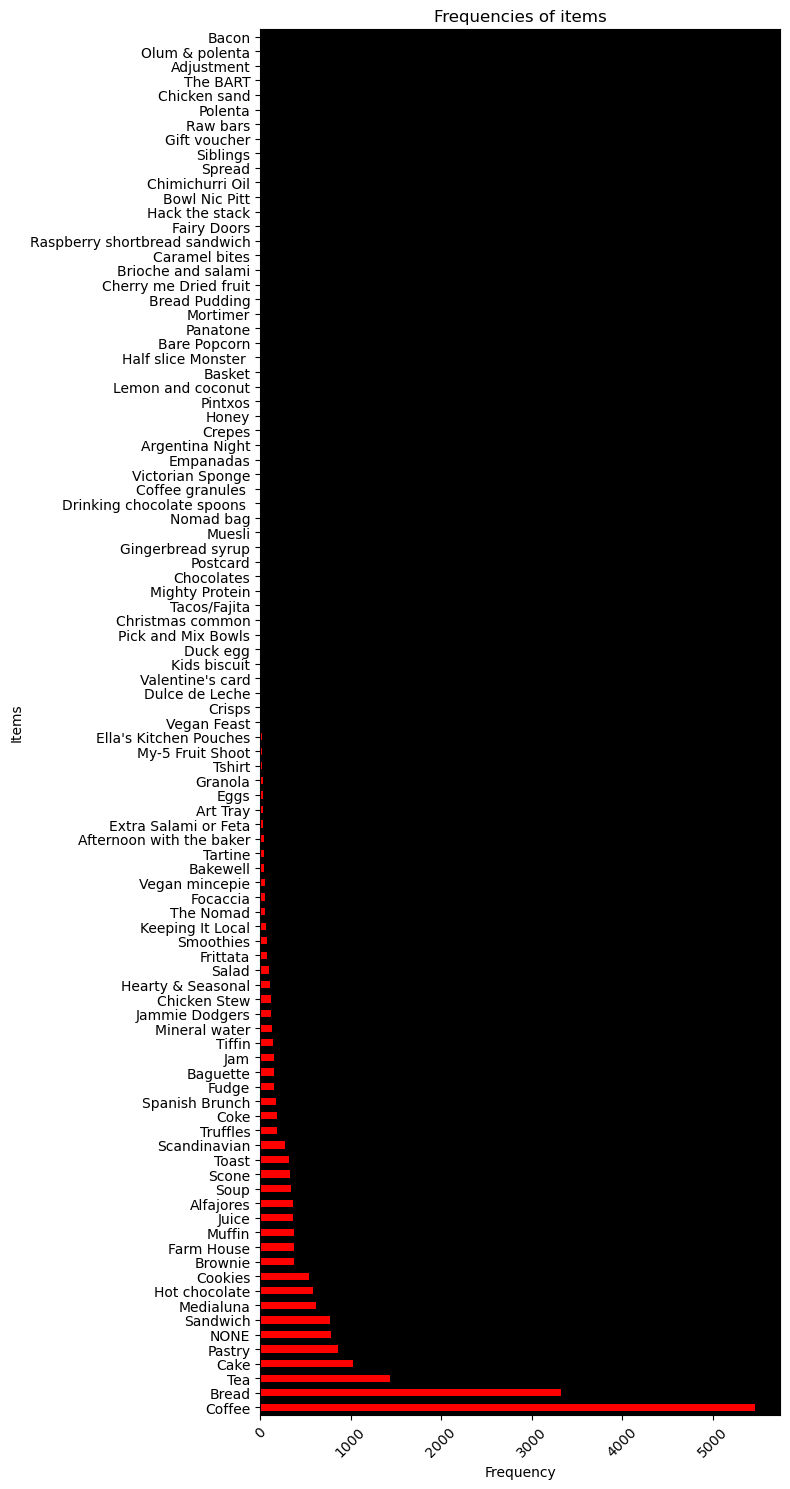

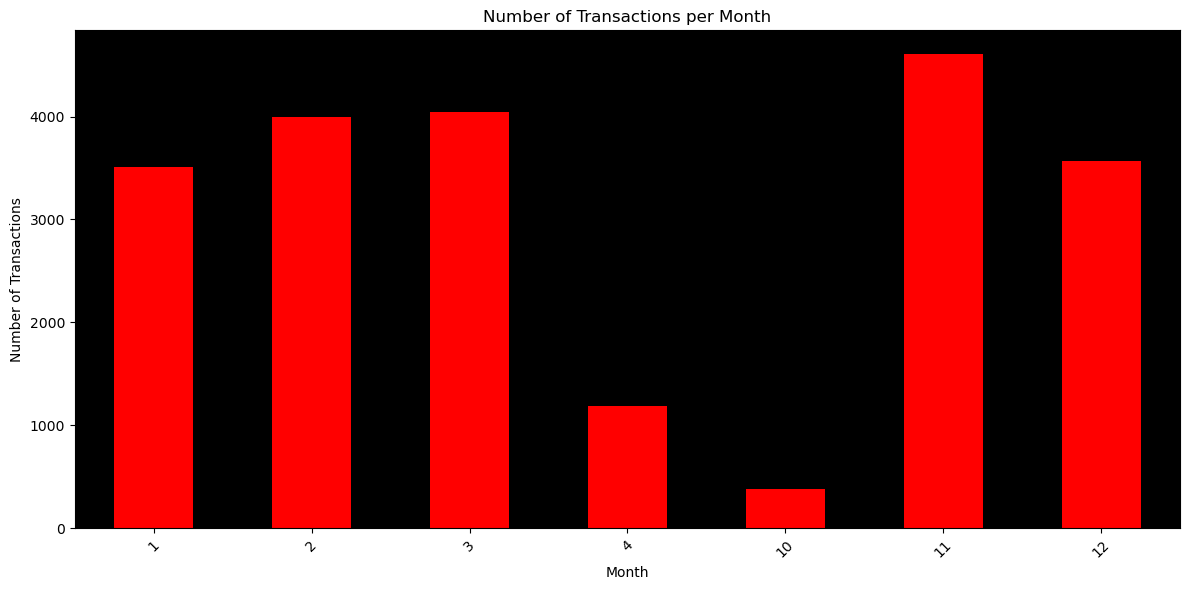

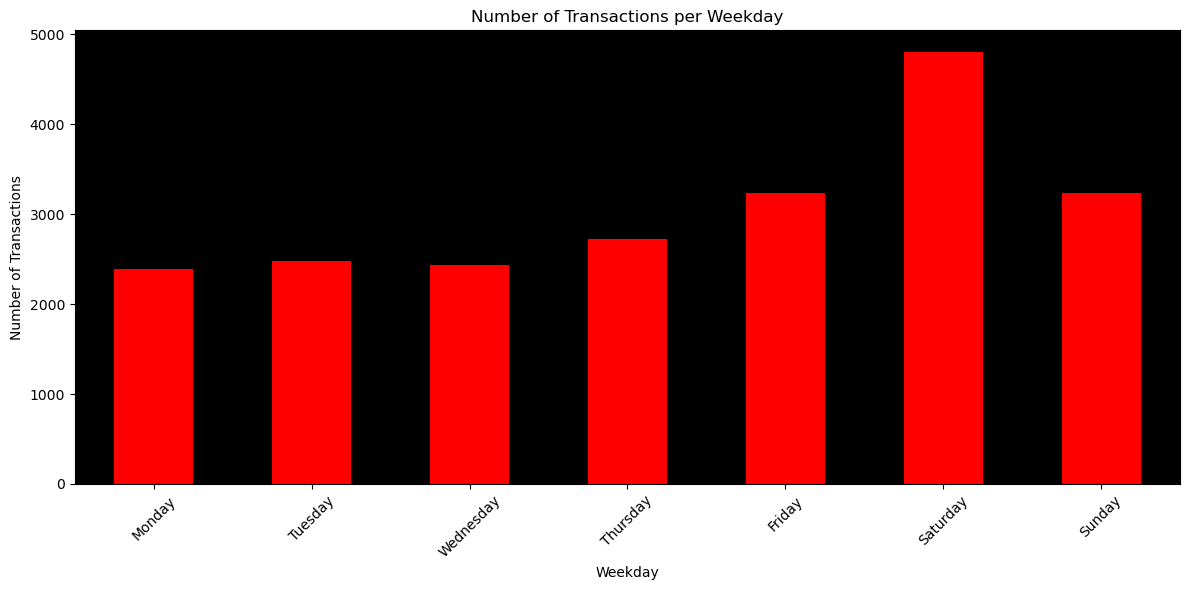

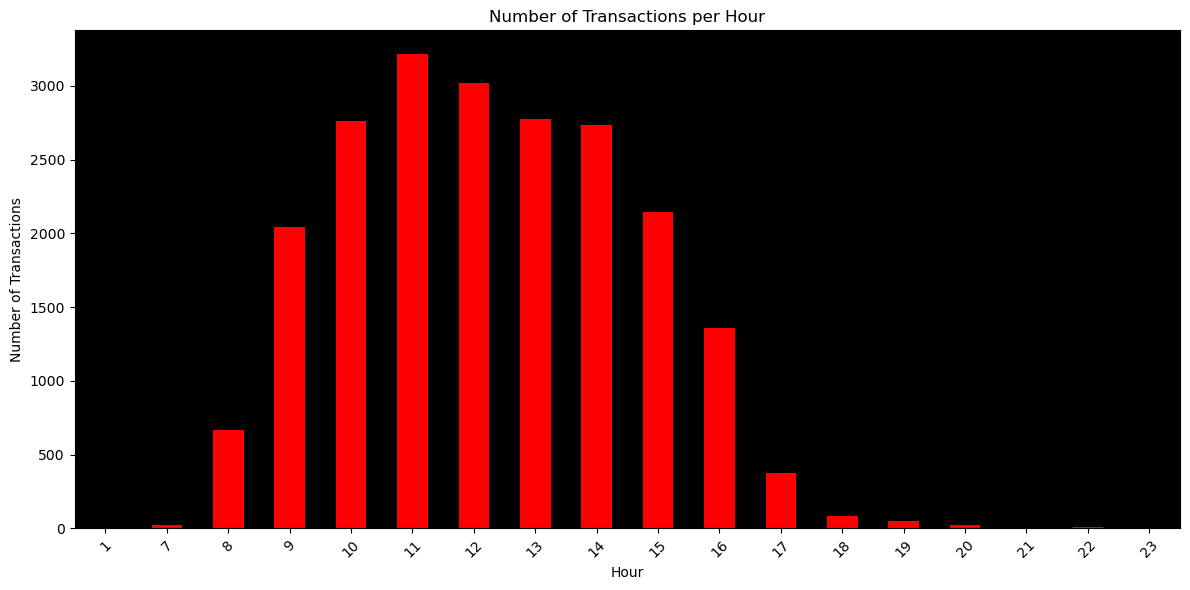

In [65]:
#Please implement Task 5 here
item_frequencies = data['Item'].value_counts()
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month
transactions_per_month = data['Month'].value_counts().sort_index()
data['Weekday'] = data['Date'].dt.weekday
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
transactions_per_weekday = data['Weekday'].value_counts().sort_index()
data['Hour'] = pd.to_datetime(data['Time']).dt.hour
transactions_per_hour = data['Hour'].value_counts().sort_index()

plt.figure(figsize=(8, 15))
item_frequencies.plot(kind='barh', color = 'red')
plt.xlabel('Frequency')
plt.ylabel('Items')
plt.title('Frequencies of items')
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().set_facecolor('black')  # Set the background color to black
plt.show()

plt.figure(figsize=(12, 6))
transactions_per_month.plot(kind='bar', color='red')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions per Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().set_facecolor('black')  # Set the background color to black
plt.show()

plt.figure(figsize=(12, 6))
transactions_per_weekday.index = [weekday_names[idx] for idx in transactions_per_weekday.index]
transactions_per_weekday.plot(kind='bar', color='red')
plt.xlabel('Weekday')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions per Weekday')
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().set_facecolor('black')  # Set the background color to black
plt.show()

plt.figure(figsize=(12, 6))
transactions_per_hour.plot(kind='bar', color='red')
plt.xlabel('Hour')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions per Hour')
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().set_facecolor('black')  # Set the background color to black
plt.show()

## Apriori Algorithm

Apriori is an algorithm for frequent item set mining and association rule learning over transactional databases. It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database.

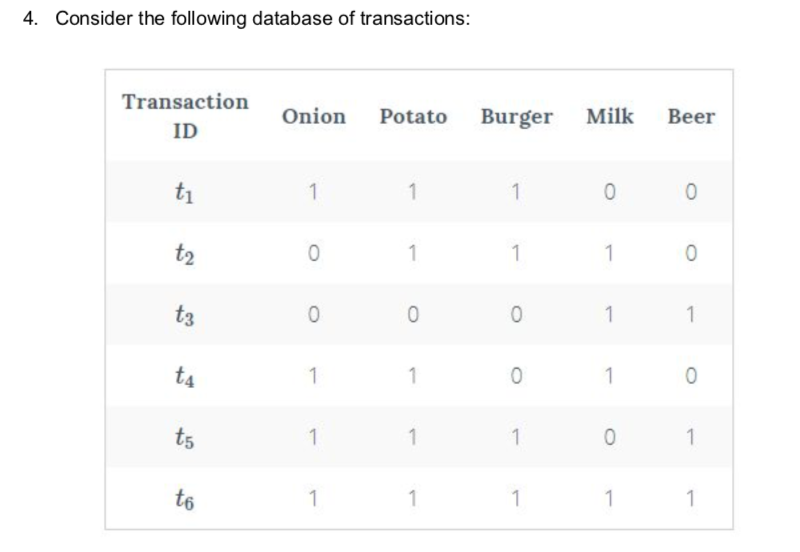

In [66]:
Image(filename='Images/Apriori0.png')

1- We create a frequency table of all the items that occur in all the transactions. 

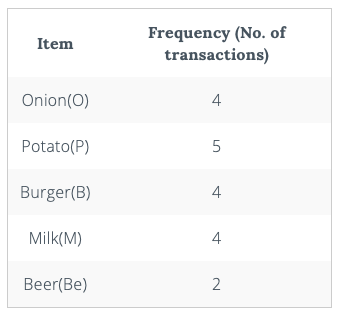

In [67]:
Image(filename='Images/Apriori.v1.png')

2- We know that elements are significant when the support is greater than or equal to the threshold support.
Here, support threshold is 50%, hence the significant items are those which occur in more than three transactions and such items are Onion(O), Potato(P), Burger(B), and Milk(M). Therefore, we are left with:

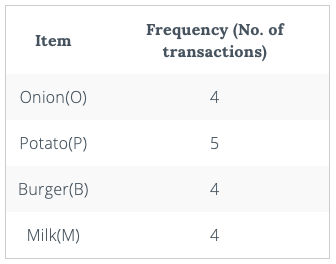

In [68]:
Image(filename='Images/Apriori.v2.png')

3- The next step is to make all the possible pairs of the significant items keeping in mind that the order doesn’t matter, i.e., AB is same as BA. To do this, take the first item and pair it with all the others such as OP, OB, OM. Similarly, consider the second item and pair it with preceding items, i.e., PB, PM. We are only considering the preceding items because PO (same as OP) already exists. So, all the pairs in our example are OP, OB, OM, PB, PM, BM.

4- We will now count the occurrences of each pair in all the transactions.

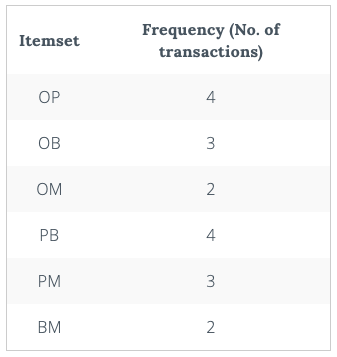

In [69]:
Image(filename='Images/Apriori.v4.png')

5- Again only those itemsets are significant which cross the support threshold, and those are OP, OB, PB, and PM.

6- Now let’s say we would like to look for a set of three items that are purchased together. We will use the itemsets found in step 5 and create a set of 3 items.

To create a set of 3 items another rule, called self-join is required. It says that from the item pairs OP, OB, PB and PM we look for two pairs with the identical first letter and so we get

OP and OB, this gives OPB, 
PB and PM, this gives PBM
Next, we find the frequency for these two itemsets.

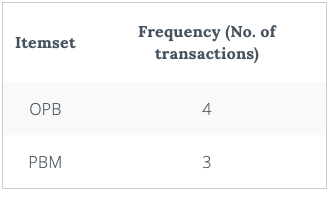

In [70]:
Image(filename='Images/Apriori.v6.png')

## Python apriori library 

In [71]:
!pip install efficient_apriori
from efficient_apriori import apriori

In [72]:
data

,Date,Time,Transaction,Item,Month,Weekday,Hour
0,2016-10-30,09:58:11,1,Bread,10,6,9
1,2016-10-30,10:05:34,2,Scandinavian,10,6,10
2,2016-10-30,10:05:34,2,Scandinavian,10,6,10
3,2016-10-30,10:07:57,3,Hot chocolate,10,6,10
4,2016-10-30,10:07:57,3,Jam,10,6,10
...,...,...,...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee,4,6,14
21289,2017-04-09,14:32:58,9682,Tea,4,6,14
21290,2017-04-09,14:57:06,9683,Coffee,4,6,14
21291,2017-04-09,14:57:06,9683,Pastry,4,6,14


In [73]:
data_itemset = data.groupby('Transaction')['Item'].apply(pd.Series.tolist).tolist()

In [74]:
for i in range(len(data_itemset)):
    data_itemset[i] = tuple(data_itemset[i])

In [75]:
itemsets, rules = apriori(data_itemset[0:], min_support=.01,  min_confidence=.1)

The apriori() function, returns both the itemsets and the association rules for the specified support and confidence levels.

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task6

- Run apriori algorithm for different min_support and a fixed min_confidence and plot a graph with x axis min_support and y-axis to be the number of rules generated.


- Run apriori algorithm for different min_confidence and a fixed min_support and plot a graph with x axis min_support and y-axis to be the number of rules generated.

</div>

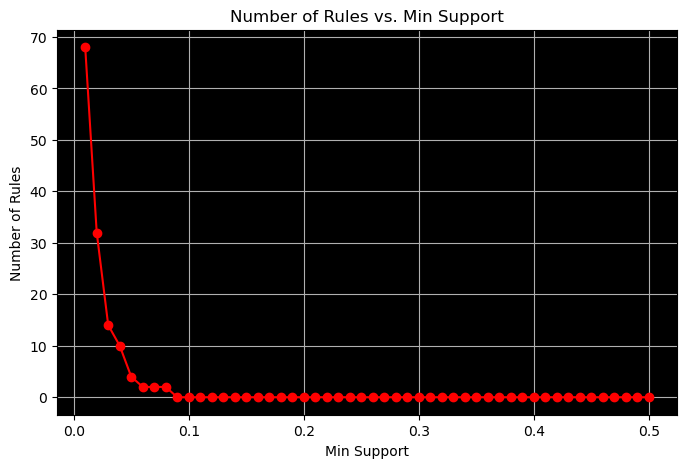

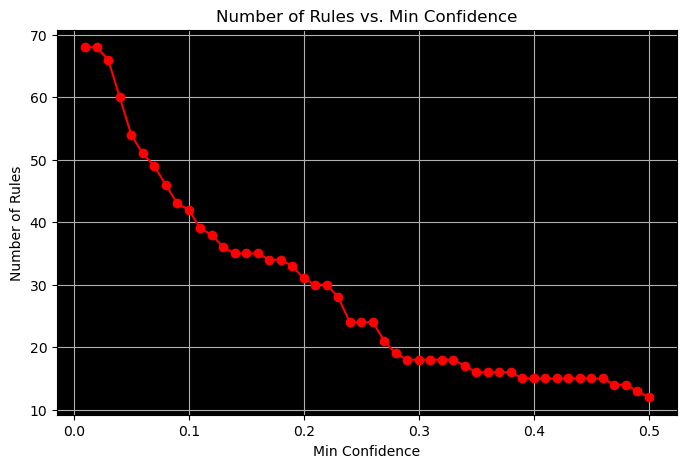

In [76]:
# Apriori algorithm for different min_support and a fixed min_confidence
def run_apriori(min_support, min_confidence):
    itemsets, rules = apriori(data_itemset[0:], min_support=min_support, min_confidence=min_confidence)
    return len(rules)

data_itemset = data.groupby('Transaction')['Item'].apply(list).tolist()
min_support_values = [i/100 for i in range(1, 51)]
fixed_min_confidence = 0.01
num_rules_support = []

for support in min_support_values:
    num_rules = run_apriori(support, fixed_min_confidence)
    num_rules_support.append(num_rules)

plt.figure(figsize=(8, 5))
plt.gca().set_facecolor('black')
plt.plot(min_support_values, num_rules_support, marker='o', linestyle='-',color='red')
plt.title('Number of Rules vs. Min Support')
plt.xlabel('Min Support')
plt.ylabel('Number of Rules')
plt.grid(True)
plt.show()

# Apriori algorithm for different min_confidence and a fixed min_support
data_itemset = data.groupby('Transaction')['Item'].apply(list).tolist()
min_confidence_values = [i/100 for i in range(1, 51)]
fixed_min_support = 0.01
num_rules_confidence = []

for confidence in min_confidence_values:
    num_rules = run_apriori(fixed_min_support, confidence)
    num_rules_confidence.append(num_rules)

plt.figure(figsize=(8, 5))
plt.gca().set_facecolor('black')
plt.plot(min_confidence_values, num_rules_confidence, marker='o', linestyle='-', color='red')
plt.title('Number of Rules vs. Min Confidence')
plt.xlabel('Min Confidence')
plt.ylabel('Number of Rules')
plt.grid(True)
plt.show()


## Visualization Association Rules

Below we define a method using the networkx library to visualize our association rules through a graph structure

In [77]:
import networkx as nx


def draw_graph(rules, rules_to_show):
    # Creating a directed graph
    G1 = nx.DiGraph()

    color_map = []
    N = 50
    colors = np.random.rand(N)
    strs = ['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']

    for i in range(rules_to_show):
        G1.add_nodes_from(["R" + str(i)])

        for a in rules[i].lhs:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R" + str(i), color=colors[i], weight=2)

        for c in rules[i].rhs:
            G1.add_edge("R" + str(i), c, color=colors[i], weight=2)

    for node in G1.nodes():
        found_a_string = False
        for item in strs:
            if node == item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')

    edges = G1.edges()
    print(edges)
    colors = [G1[u][v]['color'] for u, v in edges]
    weights = [G1[u][v]['weight'] for u, v in edges]

    pos = nx.spring_layout(G1, k=16, scale=1)
    
    # Draw the graph with labels
    nx.draw(G1, pos, edgelist=edges, node_color=color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)
    
    for p in pos:  
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    
    plt.show()


[('R0', 'Coffee'), ('Spanish Brunch', 'R0'), ('Coffee', 'R2'), ('Coffee', 'R8'), ('R1', 'Coffee'), ('Tea', 'R1'), ('Tea', 'R4'), ('Tea', 'R6'), ('R2', 'Tea'), ('R3', 'Coffee'), ('Toast', 'R3'), ('R4', 'NONE'), ('NONE', 'R5'), ('R5', 'Tea'), ('R6', 'Sandwich'), ('Sandwich', 'R7'), ('R7', 'Tea'), ('R8', 'Bread'), ('Pastry', 'R8'), ('Pastry', 'R9'), ('Bread', 'R9'), ('R9', 'Coffee')]


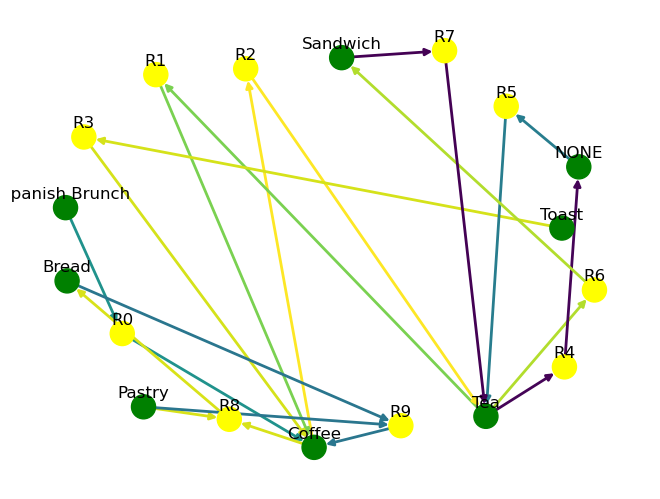

In [78]:
# We visualize a structure here
draw_graph(rules[30:40], 10)


<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task7

Draw a graph that shows a consequence and precedence for each rule around it.

More concretely consider consequence to be "Bread" and choose at most 12 rules.

</div>

[('R0', 'Bread'), ('Alfajores', 'R0'), ('R1', 'Bread'), ('Brownie', 'R1'), ('R2', 'Bread'), ('Cake', 'R2'), ('R3', 'Bread'), ('Coffee', 'R3'), ('Coffee', 'R11'), ('R4', 'Bread'), ('Cookies', 'R4'), ('R5', 'Bread'), ('Hot chocolate', 'R5'), ('R6', 'Bread'), ('Medialuna', 'R6'), ('R7', 'Bread'), ('NONE', 'R7'), ('R8', 'Bread'), ('Pastry', 'R8'), ('Pastry', 'R11'), ('R9', 'Bread'), ('Sandwich', 'R9'), ('R10', 'Bread'), ('Tea', 'R10'), ('R11', 'Bread')]


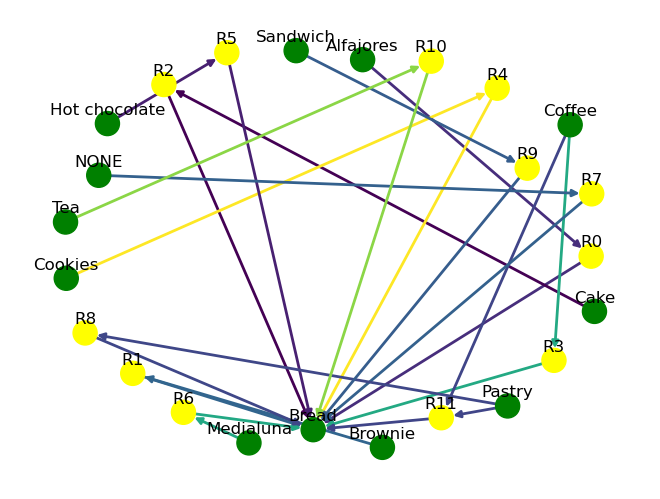

In [79]:
#Please implement Task 7 here
bread_rules = []
for i in range(len(rules)):
    if rules[i].rhs[0] == 'Bread':
        bread_rules.append(rules[i])
draw_graph(bread_rules, 12)

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task8

In the default credit dataset try to find the followings.

- Find a concise pattern.
- Find a general pattern.
- Find a peculiar pattern.

Use the definition of conciseness, generality and peculiarity from the following paper.

https://www.researchgate.net/publication/220566216_Interestingness_Measures_for_Data_Mining_A_Survey

</div>

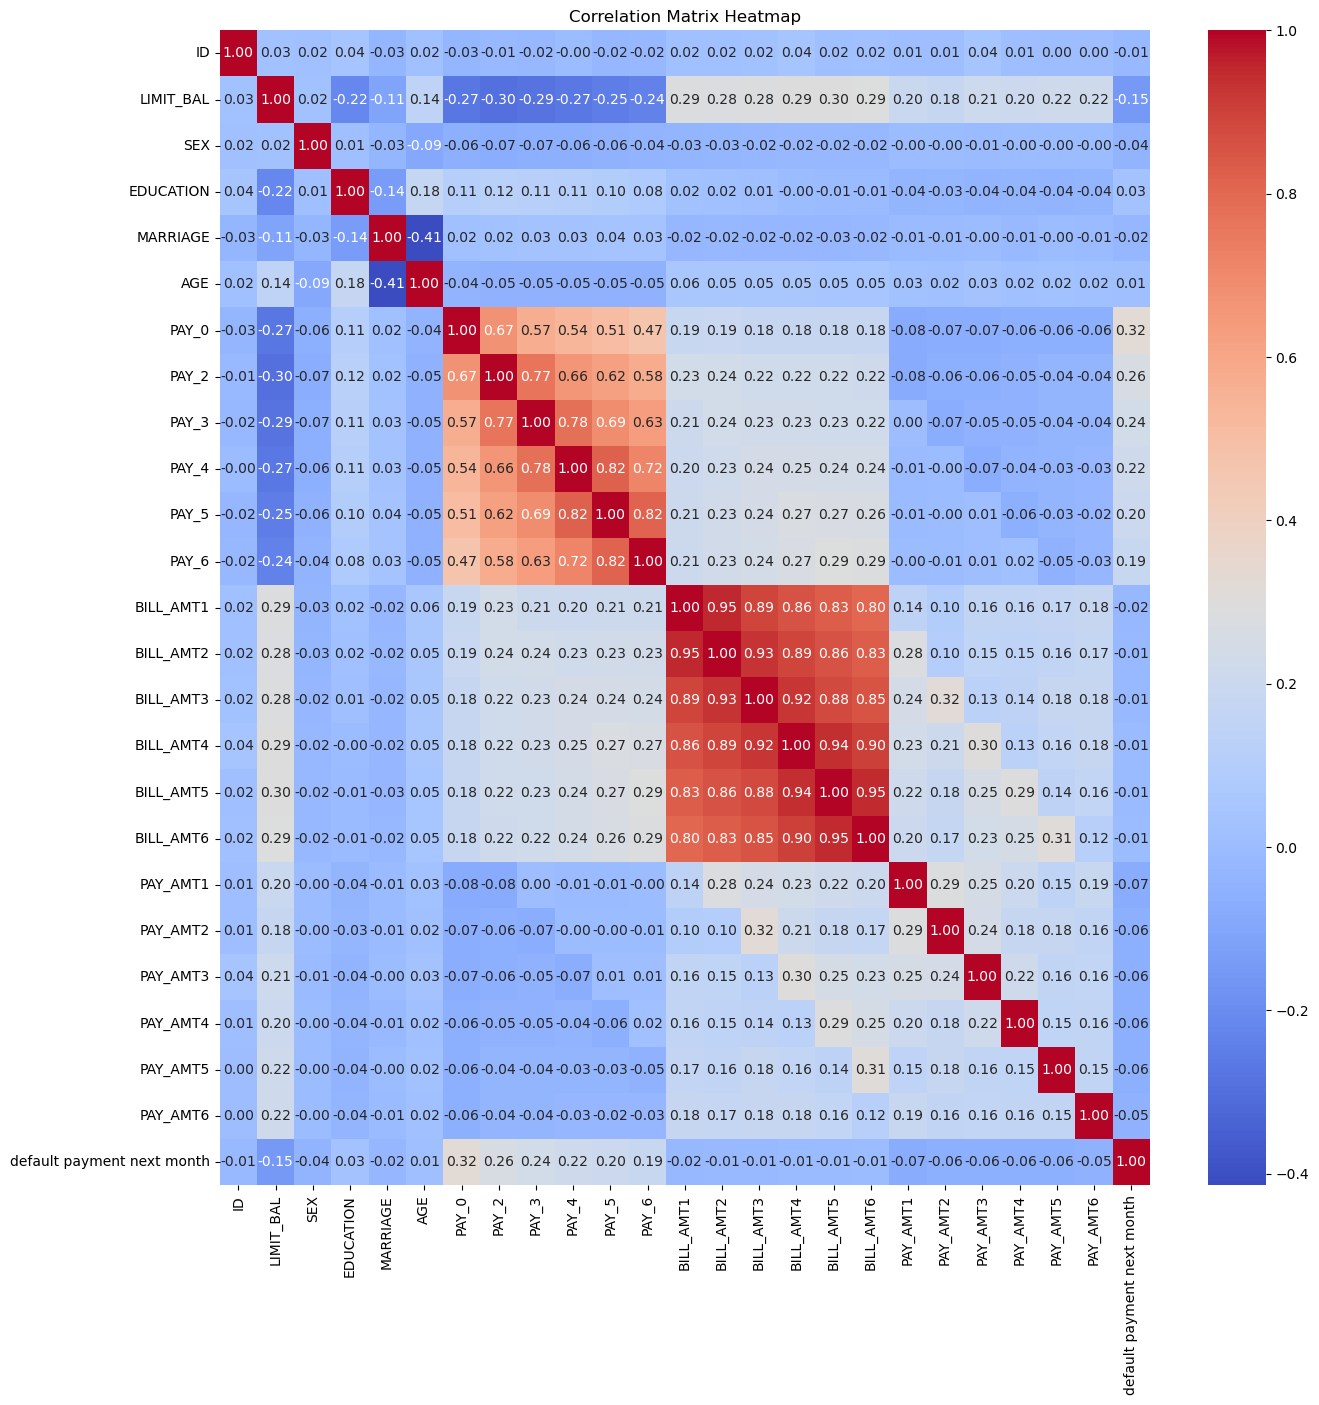

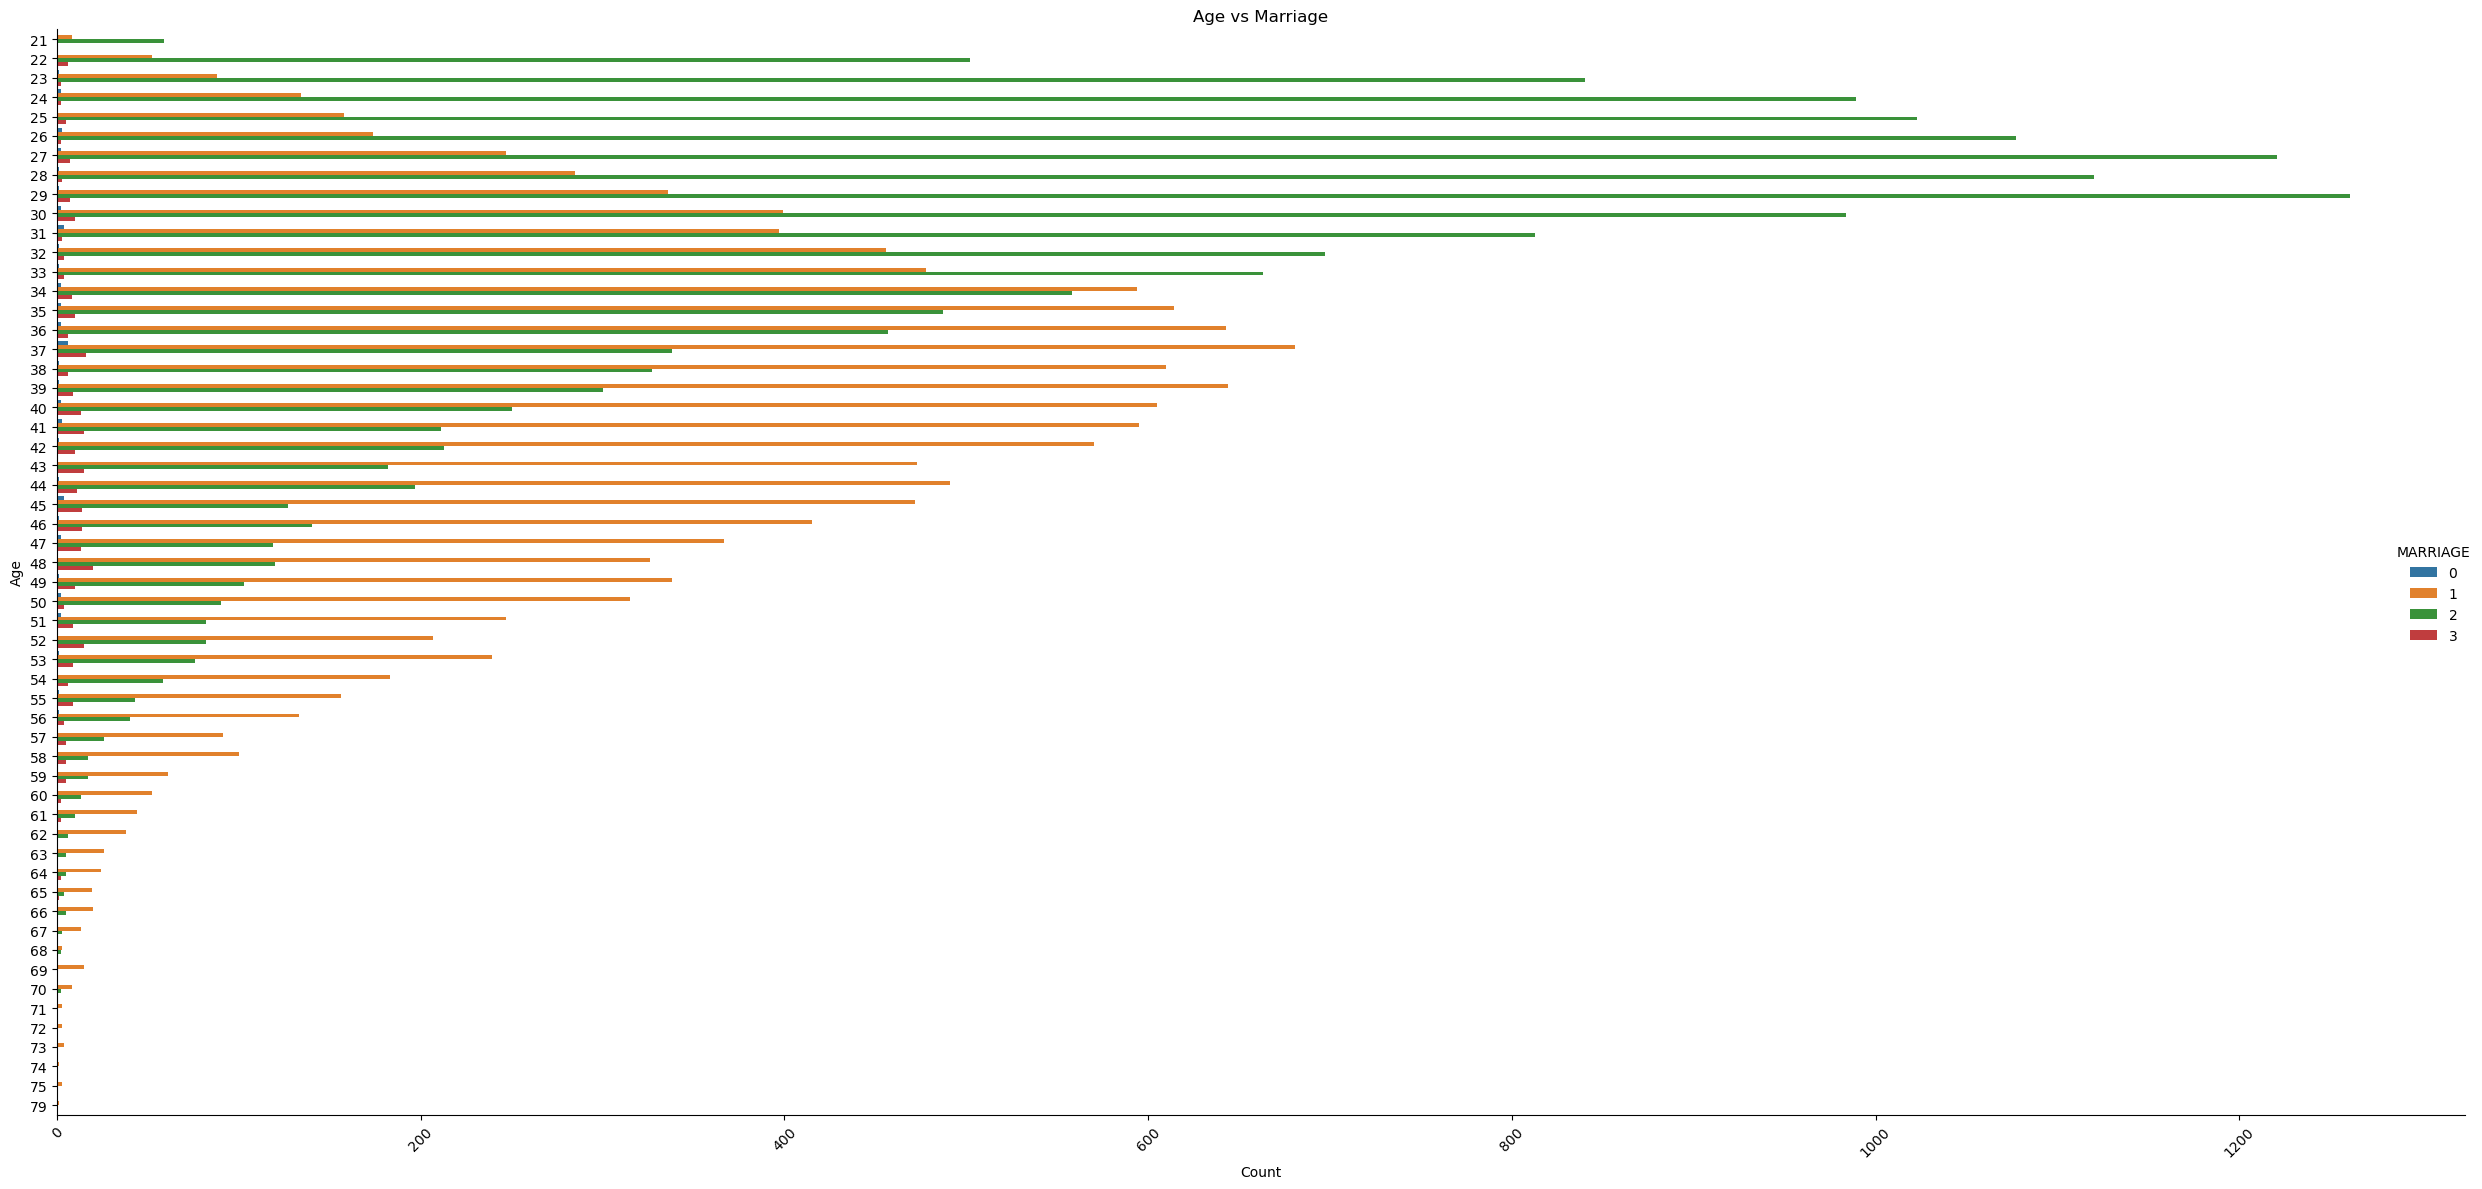

In [80]:
credit_dataset = pd.read_excel('default_of_credit_card_clients.xls', skiprows=1)

credit_dataset['MARRIAGE'] = credit_dataset['MARRIAGE'].astype('str')
numerical_columns = credit_dataset.columns[:-1]
credit_dataset[numerical_columns] = credit_dataset[numerical_columns].astype(int)

correlation_matrix = credit_dataset.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

plot = sns.catplot(data=credit_dataset, y='AGE', hue='MARRIAGE', kind='count', aspect=2, height=12)
plt.title('Age vs Marriage')
plt.xlabel('Count')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# A concise pattern is that diverse pay columns are somewhat negatively related to the persons lIMIT_BAL
# A general pattern is that the diverse bill_amount are highly positive correlated 
# A peculiar pattern is that people between 20-30 are marriage type 2

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task9

How is entropy related to frequncy of itermsets? explain.

To get help, refer to the following paper.

https://www.researchgate.net/publication/221653139_Finding_low-entropy_sets_and_trees_from_binary_data/link/5414967d0cf2bb7347db32fa/download

</div>

In [81]:
# They are both methods used in data mining to extract important data set information.
# Entropy is a measurement of the uncertainty (randomness) in a dataset,
# while Itemset Frequency is how frequent a set of items occur in a dataset.